
# Image Basics with OpenCV & Color Spaces

**Project Objectives**  
- Load images with OpenCV  
- Understand image data (dimensions, channels, and color spaces)  
- Display images with Matplotlib  


In [1]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Setup & Installs
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# For image I/O
from PIL import Image

# Data path (update if needed)
LOCAL_IMAGE_PATH = '/anvil/projects/tdm/data/icecream/hd/images/0_hd.png'



---
## Question 1

**Task:** Load and display an image with PIL + Matplotlib, then print its dimensions by converting to a NumPy array.


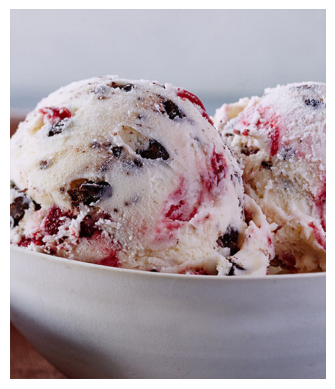

Image dimensions: 552x471x3


In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load with PIL
pil_image = Image.open(LOCAL_IMAGE_PATH)

# Display
plt.imshow(pil_image)
plt.axis('off')
plt.show()

# Convert to numpy array and report dimensions
image_array = np.asarray(pil_image)  
height, width, channels = image_array.shape 
print(f"Image dimensions: {height}x{width}x{channels}")



---
## Question 2 

**Task:** Load the image with OpenCV (`cv2.imread`), display once, then fix by swapping B and R (to RGB) and display again.


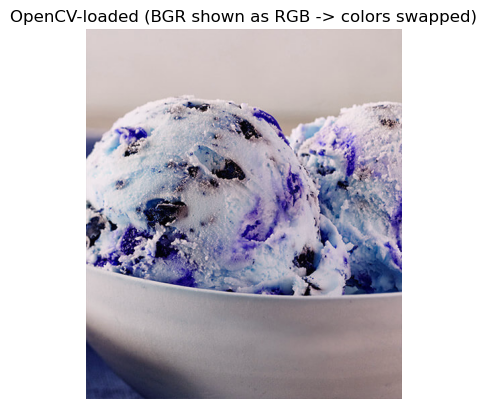

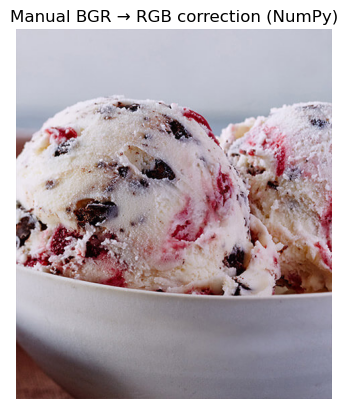

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load with OpenCV (BGR order)
image_opencv = cv2.imread(LOCAL_IMAGE_PATH)

# Display directly in Matplotlib
plt.imshow(image_opencv)
plt.axis('off')
plt.title('OpenCV-loaded (BGR shown as RGB -> colors swapped)')
plt.show()

# Manually swap channels to convert BGR to RGB using NumPy indexing
image_blue = image_opencv[:, :, 0].copy()
image_green = image_opencv[:, :, 1].copy()
image_red = image_opencv[:, :, 2].copy()
image_rgb = np.stack([image_red, image_green, image_blue], axis=-1)

# Display corrected image
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Manual BGR → RGB correction (NumPy)')
plt.show()



---
## Question 3 

**Task:** Use `cv2.cvtColor` to convert BGR to RGB and BGR to Grayscale, then display.


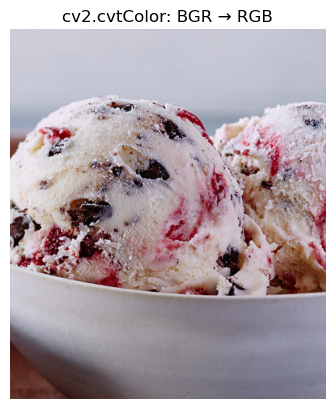

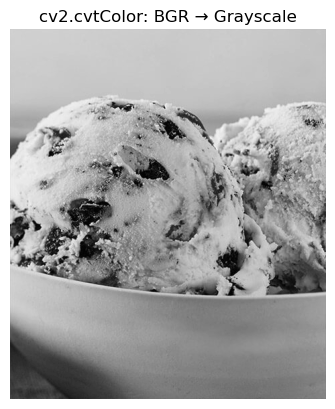

In [5]:

import cv2
import matplotlib.pyplot as plt

# Convert using OpenCV utilities
image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb_opencv)
plt.axis('off')
plt.title('cv2.cvtColor: BGR → RGB')
plt.show()

# Convert to grayscale
image_gray_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray_opencv, cmap='gray')
plt.axis('off')
plt.title('cv2.cvtColor: BGR → Grayscale')
plt.show()



---
## Question 4 

**Task:** Split channels with `cv2.split`, display (original + R/G/B channels), then plot histograms of each channel.


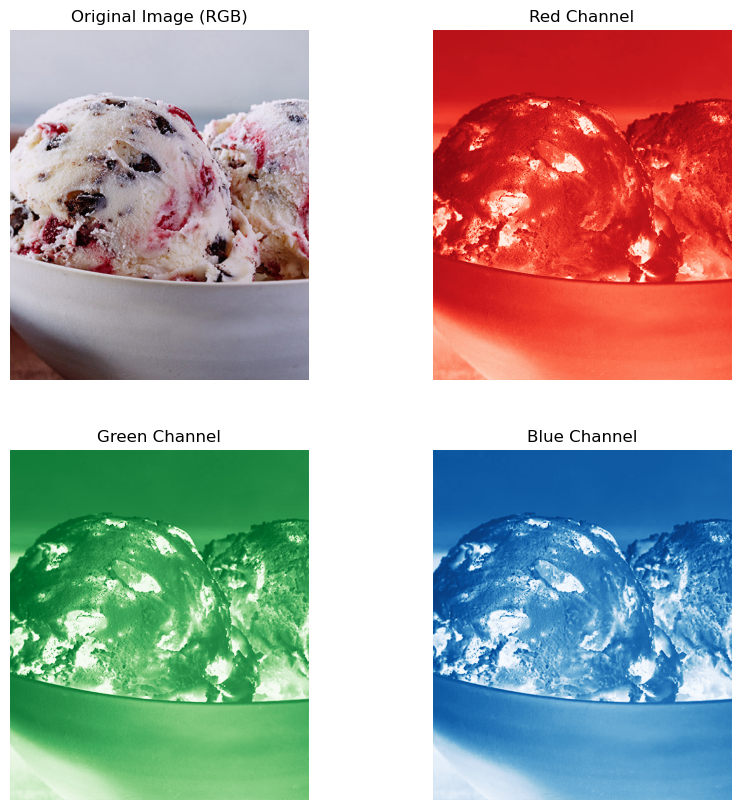

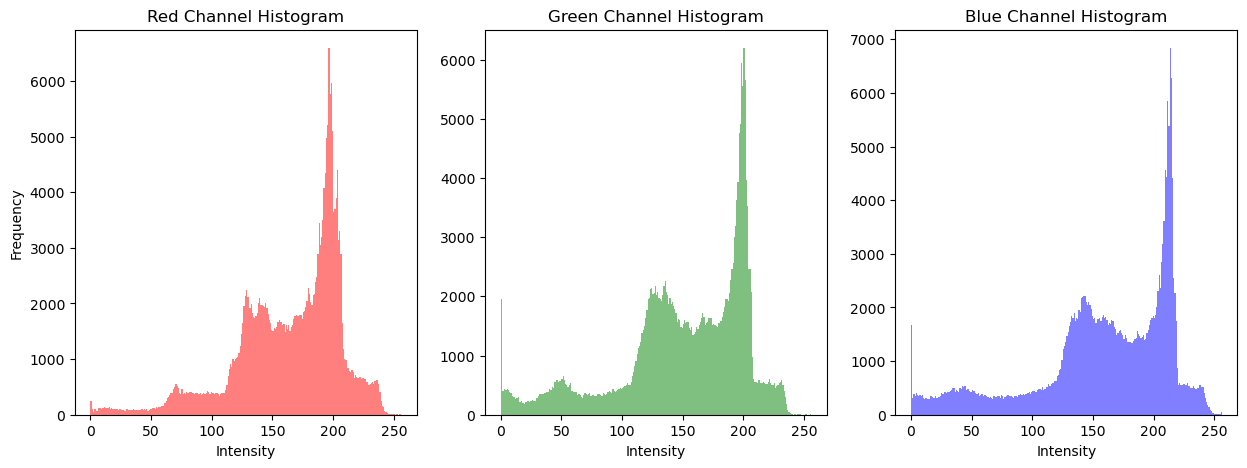

Prompt: Describe one similarity and one difference you notice between the histograms,
and explain what they correlate to in the image content.


In [6]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Split channels (on original BGR)
image_blue_opencv, image_green_opencv, image_red_opencv = cv2.split(image_opencv)

# Show original (in RGB) + channels in a 2x2 grid
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb_opencv)
plt.axis('off')
plt.title('Original Image (RGB)')

plt.subplot(2, 2, 2)
plt.imshow(image_red_opencv, cmap='Reds')
plt.axis('off')
plt.title('Red Channel')

plt.subplot(2, 2, 3)
plt.imshow(image_green_opencv, cmap='Greens')
plt.axis('off')
plt.title('Green Channel')

plt.subplot(2, 2, 4)
plt.imshow(image_blue_opencv, cmap='Blues')
plt.axis('off')
plt.title('Blue Channel')

plt.show()

# Histograms (1x3 grid)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(image_red_opencv.ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
plt.title('Red Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(image_green_opencv.ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
plt.title('Green Channel Histogram')
plt.xlabel('Intensity')

plt.subplot(1, 3, 3)
plt.hist(image_blue_opencv.ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.xlabel('Intensity')

plt.show()

print("Prompt: Describe one similarity and one difference you notice between the histograms,")
print("and explain what they correlate to in the image content.")


---
## Question 5 

**Task:** Choose manual threshold values for each channel (based on the histograms), threshold them to binary (0/255), and display.


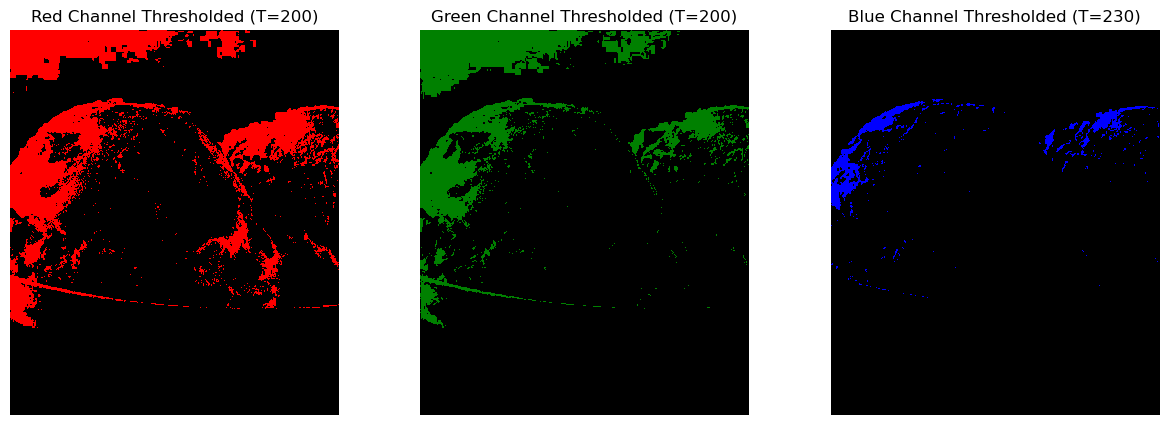

In [8]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Set your chosen values here:
red_threshold = 200    
green_threshold = 200  
blue_threshold = 230   

# Threshold each single-channel image
_, image_red_thresholded = cv2.threshold(image_red_opencv, red_threshold, 255, cv2.THRESH_BINARY)
_, image_green_thresholded = cv2.threshold(image_green_opencv, green_threshold, 255, cv2.THRESH_BINARY)
_, image_blue_thresholded = cv2.threshold(image_blue_opencv, blue_threshold, 255, cv2.THRESH_BINARY)

# Display results in a 1x3 grid
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_red_thresholded, cmap=ListedColormap(['black','red']))
plt.title(f'Red Channel Thresholded (T={red_threshold})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_green_thresholded, cmap=ListedColormap(['black','green']))
plt.title(f'Green Channel Thresholded (T={green_threshold})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_blue_thresholded, cmap=ListedColormap(['black','blue']))
plt.title(f'Blue Channel Thresholded (T={blue_threshold})')
plt.axis('off')

plt.show()
